In [1]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;


import Plots
using LaTeXStrings
using Measures
using NPZ
using EllipsisNotation

  Activating project at `~/Projects/birefringence/GSHEIntegrator`
┌ Info: Precompiling GSHEIntegrator [95376d2f-314f-47c4-97a6-da6eee6a3a26]
└ @ Base loading.jl:1423


In [2]:
Nsols = 2

ϵs = (10).^LinRange(-3, -1, 20)
geometry = GSHEIntegrator.setup_geometry(
   rsource=10, θsource=0.5π, ϕsource=0,
   robs=100, θobs=0.5π, ϕobs=π,
   a=0.99)

GSHEIntegrator.Geometry{Float64}
  dtype: Float64 <: AbstractFloat
  source: GSHEIntegrator.SphericalCoords{Float64}
  observer: GSHEIntegrator.SphericalCoords{Float64}
  direction_coords: Symbol spherical
  getmagnification: Bool false
  s: Int64 2
  a: Float64 0.99
  arrival_time: Float64 0.0
  redshift: Float64 0.0
  nloops: Float64 0.0
  ϕkilling: Float64 0.0
  ode_options: GSHEIntegrator.ODESolverOptions
  opt_options: GSHEIntegrator.OptimiserOptions
  postproc_options: GSHEIntegrator.PostprocOptions


In [3]:
N = 50
# k2 = LinRange(-1, 1, N)
# k3 = LinRange(-1, 1, N)
# dirs = GSHEIntegrator.make_2dmesh(k2, k3)
# mask = reshape(mapslices(x->sum(x) ≤ 1 , dirs.^2, dims=2), N^2)

ψs = LinRange(0.001, 0.999π, N)
ρs = LinRange(0, 2π, N)
dirs = GSHEIntegrator.make_2dmesh(ψs, ρs)
mask = ones(Bool, N^2)

iters = [i for i in 1:N^2 if mask[i]]

Z = fill(NaN, N^2)

Threads.@threads for i in iters
   Z[i] = GSHEIntegrator.magnification(dirs[i, :], geometry, 0, 2, false)
end

# Z = transpose(abs.(reshape(Z, N, N)))

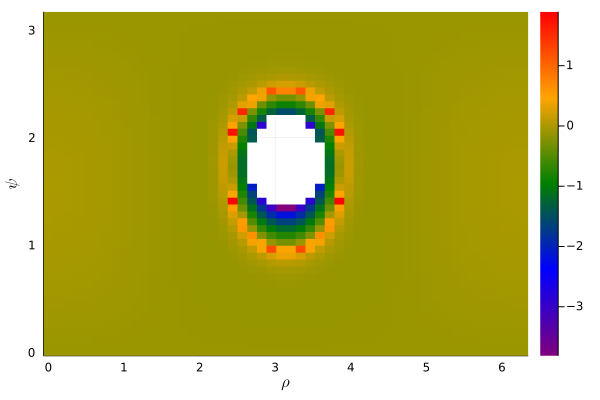

In [4]:
Z2 = log10.(transpose(abs.(reshape(Z, N, N))))
# Z2 = transpose(sign.(reshape(Z, N, N)))


fig = Plots.heatmap(ρs, ψs, Z2, c=:rainbow, dpi=450, xlabel=L"\rho", ylabel=L"\psi")

#fig = Plots.heatmap(k2, k3, Z2, c=:rainbow, dpi=450, aspect_ratio=:equal, xlim=(-1,1), ylim=(-1,1))
# Plots.savefig(fig, "~/Downloads/magnification.png")
display(fig)

In [5]:
GSHEIntegrator.magnification(dirs[315, :], geometry, 0, 2, false)

0.7789531229244264

In [23]:
geometry.getmagnification = true

true

In [43]:
Xgeo, Xgshe = GSHEIntegrator.solve_full(geometry, ϵs, false, 2)

n = 1
5.00%, ϵ=1.00e-01 10.00%, ϵ=7.85e-02 15.00%, ϵ=6.16e-02 20.00%, ϵ=4.83e-02 25.00%, ϵ=3.79e-02 30.00%, ϵ=2.98e-02 35.00%, ϵ=2.34e-02 40.00%, ϵ=1.83e-02 45.00%, ϵ=1.44e-02 50.00%, ϵ=1.13e-02 55.00%, ϵ=8.86e-03 60.00%, ϵ=6.95e-03 65.00%, ϵ=5.46e-03 70.00%, ϵ=4.28e-03 75.00%, ϵ=3.36e-03 80.00%, ϵ=2.64e-03 85.00%, ϵ=2.07e-03 90.00%, ϵ=1.62e-03 95.00%, ϵ=1.27e-03 100.00%, ϵ=1.00e-03 5.00%, ϵ=1.00e-01 10.00%, ϵ=7.85e-02 15.00%, ϵ=6.16e-02 20.00%, ϵ=4.83e-02 25.00%, ϵ=3.79e-02 30.00%, ϵ=2.98e-02 35.00%, ϵ=2.34e-02 40.00%, ϵ=1.83e-02 45.00%, ϵ=1.44e-02 50.00%, ϵ=1.13e-02 55.00%, ϵ=8.86e-03 60.00%, ϵ=6.95e-03 65.00%, ϵ=5.46e-03 70.00%, ϵ=4.28e-03 75.00%, ϵ=3.36e-03 80.00%, ϵ=2.64e-03 85.00%, ϵ=2.07e-03 90.00%, ϵ=1.62e-03 95.00%, ϵ=1.27e-03 100.00%, ϵ=1.00e-03 n = 2
5.00%, ϵ=1.00e-01 10.00%, ϵ=7.85e-02 15.00%, ϵ=6.16e-02 20.00%, ϵ=4.83e-02 25.00%, ϵ=3.79e-02 30.00%, ϵ=2.98e-02 35.00%, ϵ=2.34e-02 40.00%, ϵ=1.83e-02 45.00%, ϵ=1.44e-02 50.00%, ϵ=1.13e-02 55.00%, ϵ=8.86e-03 60.00%, ϵ=6.95e-03 6

([2.4097584234351492 3.141592653589668 … 2.0 -1.367293547184965; 0.888861244265383 3.1415926535898913 … 1.0 2.035144731522678], [2.409758132183131 2.4097581321831303; 0.8888613481599779 0.8888613481599921;;; 2.409757950506942 2.409757950506939; 0.8888614129670254 0.8888614129670354;;; 2.409757655505446 2.4097576555054423; 0.8888615181992571 0.8888615181992354;;; … ;;; 2.4086544220795716 2.408654422079573; 0.8892555388466059 0.8892555388465982;;; 2.407966405387682 2.4079664053876924; 0.8895017487012059 0.8895017487011984;;; 2.406850252027101 2.4068502520271076; 0.8899019613084648 0.8899019613084702;;;; 3.1423595296112836 3.1408257775680575; 3.142017325354768 3.141167981824889;;; 3.142569864342448 3.140615442836904; 3.142133802204283 3.141051504975516;;; 3.142837888437858 3.140347418741646; 3.1422822257474228 3.1409030814325267;;; … ;;; 3.1887681495676214 3.094417157611973; 3.1677480503741746 3.115437256805488;;; 3.2016656380960846 3.081519669083693; 3.1749234571110527 3.108261850068483;

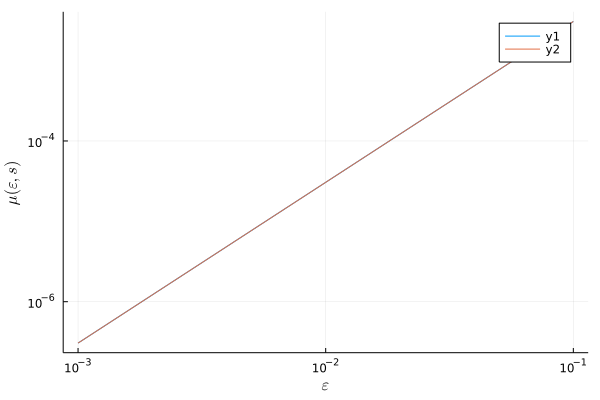

In [44]:
fig = Plots.plot(xscale=:log10, xlabel=L"\epsilon", ylabel=L"\mu(\epsilon, s)", yscale=:log10)
igeo = 1
for s in 1:2
    Plots.plot!(fig, ϵs, abs.(Xgshe[igeo, s, :, end] .- Xgeo[igeo, end]))
end
Plots.savefig(fig, "~/Downloads/magnification.png")
display(fig)

In [46]:
igeo = 2
ϵs
Δ = abs.(Xgshe[igeo, 1, :, end] .- Xgeo[igeo, end])


GSHEIntegrator.bootstrap_powerlaw(ϵs, Δ)

Dict{String, Vector{Float64}} with 2 entries:
  "alpha" => [2.00024, 8.16335e-5]
  "beta"  => [0.380803, 0.000166618]

In [31]:
Xgshe = npzread("../data/run_13/Xgshes.npy")
Xgeos = npzread("../data/run_13/Xgeos.npy")
dir1 = npzread("../data/run_13/dir1.npy")
dir2 = npzread("../data/run_13/dir2.npy")

ϵs = npzread("../data/run_13/Epsilons.npy")

dirs = GSHEIntegrator.make_2dmesh(dir1, dir2)

betas = npzread("../data/run_13/betas.npy")


m = (.~isnan.(betas[:, 1])) .& (betas[:, 1] .> 0.001)

i = 128
println(betas[m, ..][i, :])
p0 = Xgeos[m, ..][i, 1:2]

[0.007309227769611012, 8.680291683725242e-6]


2-element Vector{Float64}:
 1.641229960873126
 1.7093650609019766

In [32]:
function f(p0)
    xf = GSHEIntegrator.solve_problem(p0, geometry, 0, 2)[:, end]
    xf[1] = GSHEIntegrator.static_observer_proper_time(xf, 0.99)
    return xf
end


f (generic function with 1 method)

In [33]:
J = ForwardDiff.jacobian(f, p0)

7×2 Matrix{Float64}:
   0.573664     14.8738
  -6.47934e-15  -3.57945e-13
  -0.322106     -1.3011
   2.75175      -1.09115
  -0.000254129   0.0015311
   8.00504      -1.66287
 -10.0361        0.0

In [34]:
det(J[3:4, :])

3.931767035903642